In [19]:
from PIL import Image
import numpy as np
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

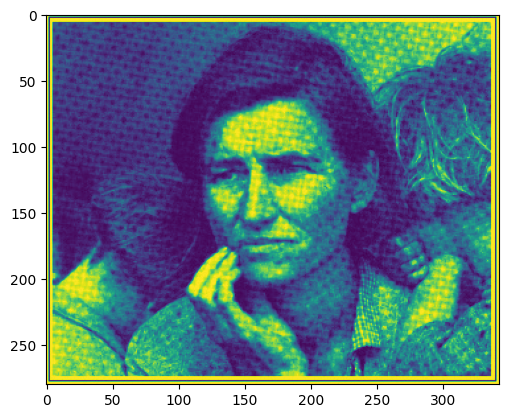

In [20]:
#Using opencv
#Give image path
imagepath1 = '/Users/vaibhavrathore1999/Downloads/MS/EE 610 Image Processing/Assignments/comp_assgn2_images/man_with_dots.jpg'
imagecv = cv2.imread(imagepath1,0) #Importing Image
#Display image
plt.imshow(imagecv)
plt.show()

#The image is displayed below

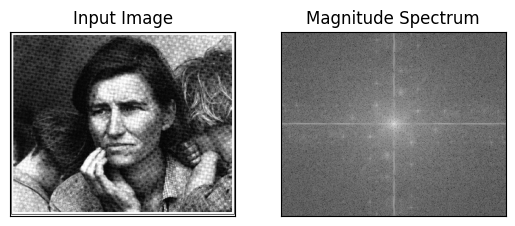

In [21]:
image_array=np.array(imagecv)
f_trans=np.fft.fft2(image_array)
f_trans_shift=np.fft.fftshift(f_trans)
magnitude_spectrum = np.log(np.abs(f_trans_shift) + 1)
# Display the original image and the magnitude spectrum
plt.subplot(121), plt.imshow(imagecv, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Using Ideal Notch Filter

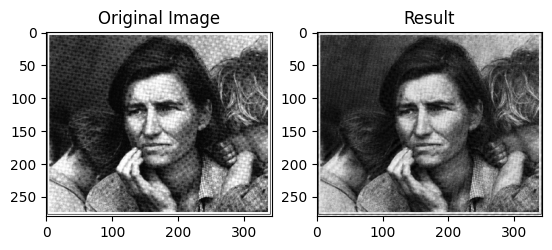

In [22]:
def reject_filter(shape,d0,p,q):
    uk,vk=p,q
    M,N=shape
    H=np.zeros((M,N))
    for i in range(0,M):
        for j in range(0,N):
            D_uv=np.sqrt((i-M/2-uk)**2+(j-N/2-vk)**2)
            D_muv=np.sqrt((i-M/2+uk)**2+(j-N/2+vk)**2)
            if D_uv <= d0 or D_muv <= d0:
                H[i, j] = 0.0
            else:
                H[i, j] = 1.0
    return H

h1=reject_filter(imagecv.shape,6,23,25)
h2=reject_filter(imagecv.shape,6,-23,37)
h3=reject_filter(imagecv.shape,4,60,30)
h4=reject_filter(imagecv.shape,4,-55,32)
h5=reject_filter(imagecv.shape,6,-50,10)
h6=reject_filter(imagecv.shape,6,-15,-60)
h7=reject_filter(imagecv.shape,4,-17,77)
h8=reject_filter(imagecv.shape,6,-23,-25)
h9=reject_filter(imagecv.shape,6,23,-37)
h10=reject_filter(imagecv.shape,4,-60,-30)
h11=reject_filter(imagecv.shape,4,55,-32)
h12=reject_filter(imagecv.shape,6,50,-10)
h13=reject_filter(imagecv.shape,6,15,60)
h14=reject_filter(imagecv.shape,4,17,-77)

notch_filter=h1*h2*h3*h4*h5*h6*h7*h8*h9*h10*h11*h12*h13*h14
filtered_image=f_trans_shift*notch_filter
sif_trans=np.fft.ifftshift(filtered_image)
if_trans=np.fft.ifft2(sif_trans)
Result = np.abs(if_trans)
plt.subplot(121)
plt.imshow(imagecv, "gray") 
plt.title("Original Image")

plt.subplot(122)
plt.imshow(Result, "gray") 
plt.title("Result")
plt.show()

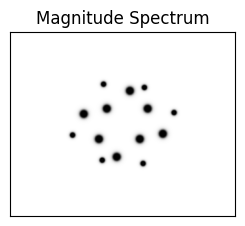

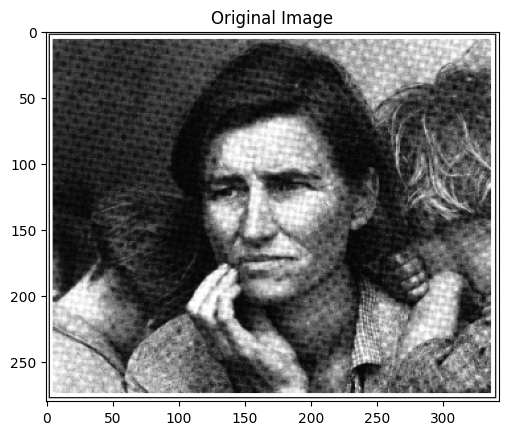

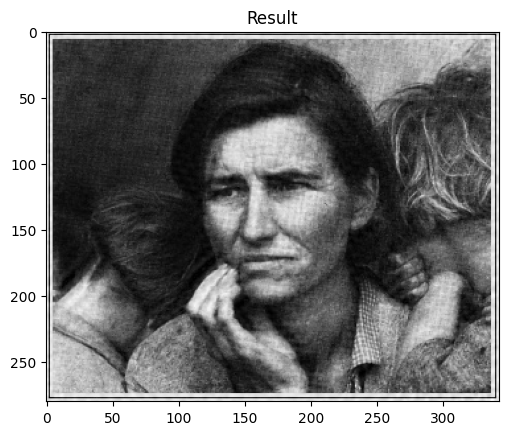

In [23]:
def reject_filter1(sh,d0,p,q):
    n=6
    uk=p
    vk=q
    M,N=sh
    H=np.zeros((M,N))
    for i in range(0,M):
        for j in range(0,N):
            D_uv=np.sqrt((i-M/2-uk)**2+(j-N/2-vk)**2)
            D_muv=np.sqrt((i-M/2+uk)**2+(j-N/2+vk)**2)
            H[i,j]=(1/(1+(d0/D_uv)**n))*(1/(1+(d0/D_uv)**n))
    return H

h1=reject_filter1(imagecv.shape,6,23,25)
h2=reject_filter1(imagecv.shape,6,-23,37)
h3=reject_filter1(imagecv.shape,4,60,30)
h4=reject_filter1(imagecv.shape,4,-55,32)
h5=reject_filter1(imagecv.shape,6,-50,10)
h6=reject_filter1(imagecv.shape,6,-15,-60)
h7=reject_filter1(imagecv.shape,4,-17,77)
h8=reject_filter1(imagecv.shape,6,-23,-25)
h9=reject_filter1(imagecv.shape,6,23,-37)
h10=reject_filter1(imagecv.shape,4,-60,-30)
h11=reject_filter1(imagecv.shape,4,55,-32)
h12=reject_filter1(imagecv.shape,6,50,-10)
h13=reject_filter1(imagecv.shape,6,15,60)
h14=reject_filter1(imagecv.shape,4,17,-77)

notch_filter=h1*h2*h3*h4*h5*h6*h7*h8*h9*h10*h11*h12*h13*h14
filtered_image=f_trans_shift*notch_filter
sif_trans=np.fft.ifftshift(filtered_image)
if_trans=np.fft.ifft2(sif_trans)
Result = np.abs(if_trans)

magnitude_spectrum = np.log(np.abs(notch_filter) + 1)
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(imagecv, "gray") 
plt.title("Original Image")
plt.show()

plt.imshow(Result, "gray") 
plt.title("Result")
plt.show()

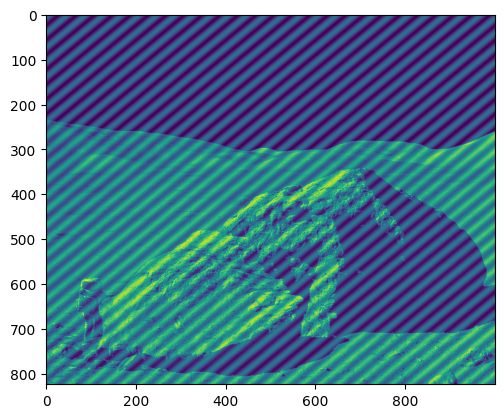

In [24]:
#Using opencv
#Give image path
imagepath1 = '/Users/vaibhavrathore1999/Downloads/MS/EE 610 Image Processing/Assignments/comp_assgn2_images/astronaut-interference.tif'
imagecv = cv2.imread(imagepath1,0) #Importing Image
#Display image
plt.imshow(imagecv)
plt.show()

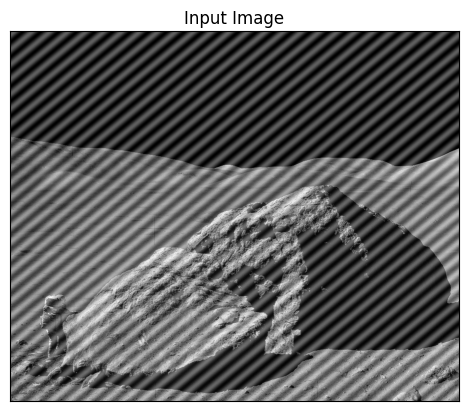

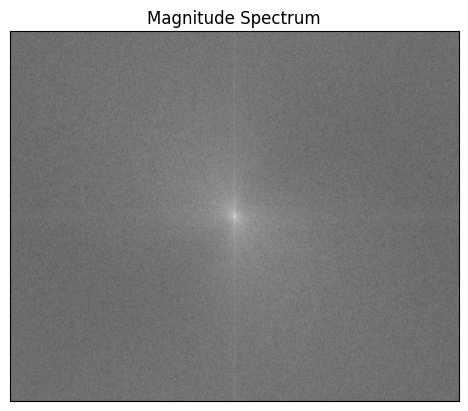

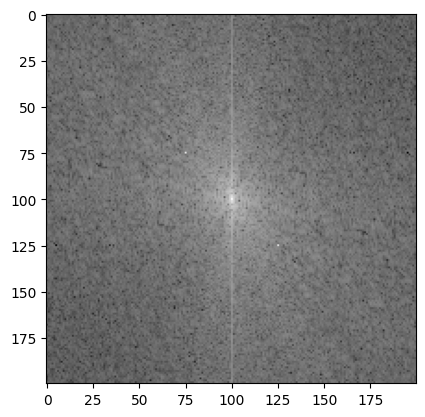

In [25]:
image_array=np.array(imagecv)
f_trans=np.fft.fft2(image_array)
f_trans_shift=np.fft.fftshift(f_trans)
magnitude_spectrum = np.log(np.abs(f_trans_shift) + 1)
# Display the original image and the magnitude spectrum
plt.imshow(imagecv, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
M,N=imagecv.shape
img=magnitude_spectrum[M//2-100:M//2+100,N//2-100:N//2+100]
plt.imshow(img,cmap='gray')

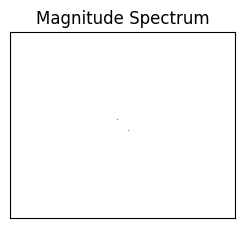

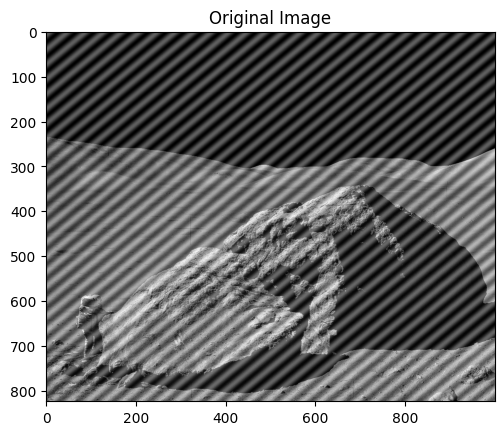

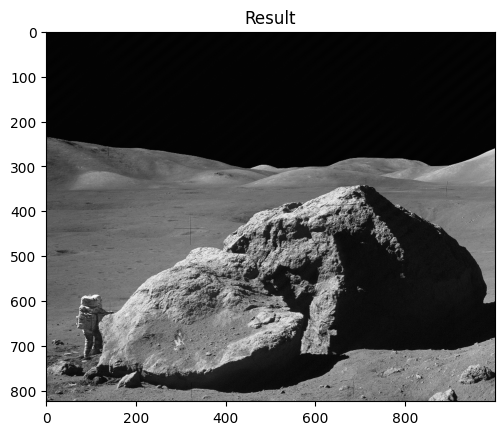

In [26]:
H1=reject_filter(imagecv.shape,2,25,25)
notch_filter=H1

filtered_image=f_trans_shift*notch_filter
sif_trans=np.fft.ifftshift(filtered_image)
if_trans=np.fft.ifft2(sif_trans)
Result = np.abs(if_trans)

magnitude_spectrum = np.log(np.abs(notch_filter) + 1)
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(imagecv, "gray") 
plt.title("Original Image")
plt.show()

plt.imshow(Result, "gray") 
plt.title("Result")
plt.show()


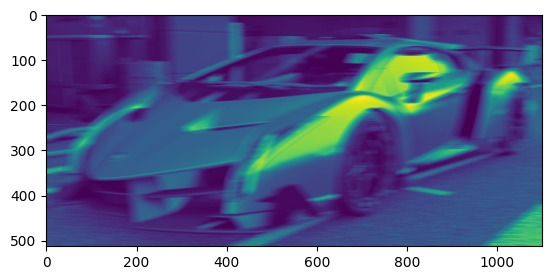

In [27]:
#Using opencv
#Give image path
imagepath1 = '/Users/vaibhavrathore1999/Downloads/MS/EE 610 Image Processing/Assignments/comp_assgn2_images/car_motion_blur.jpg'
imagecv = cv2.imread(imagepath1,0) #Importing Image
#Display image
plt.imshow(imagecv)
plt.show()

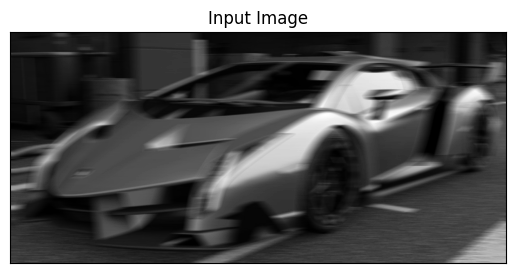

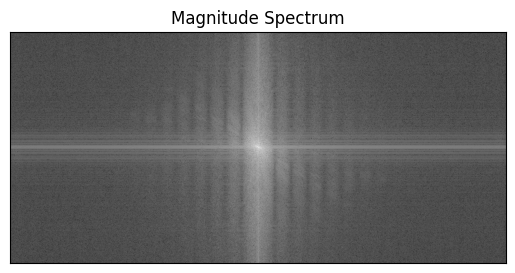

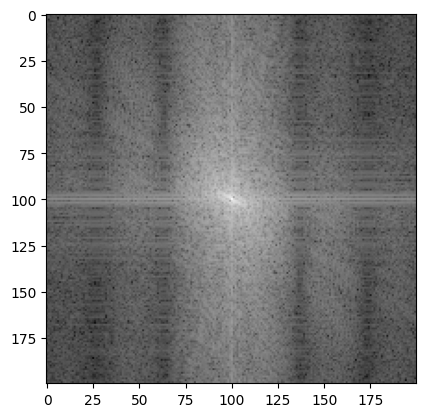

In [28]:
image_array=np.array(imagecv)
f_trans=np.fft.fft2(image_array)
f_trans_shift=np.fft.fftshift(f_trans)
magnitude_spectrum = np.log(np.abs(f_trans_shift) + 1)

# Display the original image and the magnitude spectrum
plt.imshow(imagecv, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

M,N=imagecv.shape
img=magnitude_spectrum[M//2-100:M//2+100,N//2-100:N//2+100]
plt.imshow(img,cmap='gray')

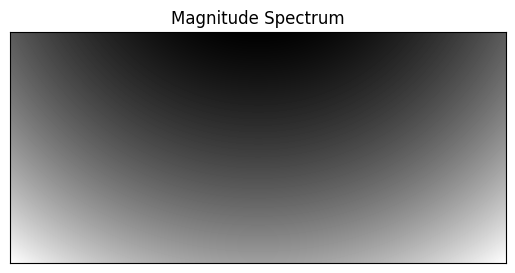

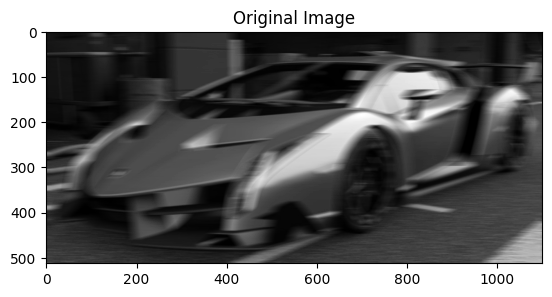

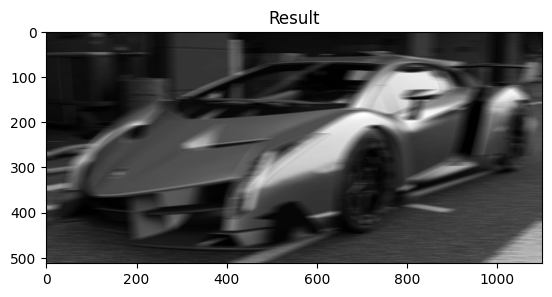

In [29]:
def weiner_filter(shape,k):
    M,N=shape
    H=np.zeros((M,N))
    for i in range(0,M):
        for j in range(0,N):
            H[i,j]=np.exp(-k*((i+M/2)**2+(j-N/2)**2)**(5/6))
    
    return H

h1=weiner_filter(imagecv.shape,0.00002)
h1c=np.conj(h1)
K=0.000005


req_filter=h1c/(np.abs(h1)**2 + K)

filtered_image=f_trans_shift*req_filter
sif_trans=np.fft.ifftshift(filtered_image)
if_trans=np.fft.ifft2(sif_trans)
Result = np.abs(if_trans)

magnitude_spectrum = np.log(np.abs(req_filter) + 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(imagecv, "gray") 
plt.title("Original Image")
plt.show()

plt.imshow(Result, "gray") 
plt.title("Result")
plt.show()




In [34]:

def wiener_deconvolution(image_blurred, psf, noise_var):
    # Wiener deconvolution formula
    fft_image = np.fft.fft2(image_blurred, s=image_blurred.shape)
    fft_psf = np.fft.fft2(psf, s=image_blurred.shape)
    fft_inverse = np.conj(fft_psf) / (np.abs(fft_psf) ** 2 + noise_var)
    restored_image = np.fft.ifft2(fft_image * fft_inverse)
    restored_image = np.abs(np.fft.fftshift(restored_image))
    return restored_image

# Load the blurred image and PSF (Point Spread Function)
blurred_image = imagecv
psf = cv2.imread('psf.jpg', cv2.IMREAD_GRAYSCALE)

# Convert images to grayscale and normalize
blurred_image_gray = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY) / 255.0
psf = psf.astype(np.float32) / 255.0

# Set the noise variance (you may need to experiment with this value)
noise_variance = 1e-3

# Perform Wiener deconvolution
restored_image_gray = wiener_deconvolution(blurred_image_gray, psf, noise_variance)

# Convert restored image to color
restored_image = cv2.merge([restored_image_gray, restored_image_gray, restored_image_gray])

# Display the original blurred image and the restored image
plt.imshow('Blurred Image', blurred_image)
plt.show()
plt.imshow('Restored Image', restored_image)
plt.show()


[ WARN:0@1005.231] global loadsave.cpp:248 findDecoder imread_('psf.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1
